In [56]:
import datetime as dt
import pandas as pd
import praw
from psaw import PushshiftAPI
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

r = praw.Reddit(
    client_id="qQMKydO151j7JYiXmdogOQ",
    client_secret="qyasSsnjEiR1BOZlSlsc3sCBJO21oA",
    user_agent="python:ml_projectv1.0.0 (by /u/rhyminzeta)",
)
api = PushshiftAPI(r)

In [32]:
subreddit_names = ["aww", "HumansBeingBros", "wholesomememes", "depression", "SuicideWatch", "depression_memes", "anxiety", "anxietymemes","healthanxiety"]
df_sub_list = []

In [33]:
start_epoch=int(dt.datetime(2021, 1, 1).timestamp())

In [34]:
for name in subreddit_names:
    comments_generator = api.search_comments(after=start_epoch, subreddit=name, limit=2000) # Returns a generator object
    comments = list(comments_generator)
    df_sub = pd.DataFrame([ vars(post) for post in comments ])
    df_sub['subreddit_name'] = name
    df_sub_list.append(df_sub)

C:\Users\drent\Anaconda3\envs\Kaggle - ML\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\drent\Anaconda3\envs\Kaggle - ML\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [35]:
df_total = pd.concat(df_sub_list)

In [36]:
df_total.describe()

,ups,total_awards_received,gilded,score,downs,created,created_utc,controversiality
count,17991.00000,17991.000000,17991.000000,17991.00000,17991.0,1.799100e+04,1.799100e+04,17991.000000
mean,4.85515,0.002112,0.000222,4.85515,0.0,1.655983e+09,1.655983e+09,0.005447
std,36.40820,0.070699,0.014910,36.40820,0.0,1.797023e+06,1.797023e+06,0.073606
min,-78.00000,0.000000,0.000000,-78.00000,0.0,1.646440e+09,1.646440e+09,0.000000
25%,1.00000,0.000000,0.000000,1.00000,0.0,1.656436e+09,1.656436e+09,0.000000
50%,1.00000,0.000000,0.000000,1.00000,0.0,1.656572e+09,1.656572e+09,0.000000
75%,2.00000,0.000000,0.000000,2.00000,0.0,1.656628e+09,1.656628e+09,0.000000
max,2105.00000,6.000000,1.000000,2105.00000,0.0,1.656653e+09,1.656653e+09,1.000000


In [37]:
df_total['body']

0                                                     🐱🐱🐱
1                                                    John
2                                                    Tiny
3                                 Hiethcliff, Garfield..?
4                                       Walter. Or Henry.
                              ...                        
1995    Found out about celiac disease and terrified. ...
1996    Consider be super-duper impressed, broski!! Yo...
1997    I slept with my Apple Watch yesterday and the ...
1998                                         Let us know!
1999    Convinced something is very wrong with my brai...
Name: body, Length: 17991, dtype: object

In [38]:
df_total.to_csv('raw.csv')

In [40]:
df_edit = df_total[["body","score","subreddit_name"]]

In [42]:
df_edit.drop_duplicates(subset=['body'])

,body,score,subreddit_name
0,🐱🐱🐱,0,aww
1,John,1,aww
2,Tiny,1,aww
3,"Hiethcliff, Garfield..?",1,aww
4,Walter. Or Henry.,1,aww
...,...,...,...
1995,Found out about celiac disease and terrified. ...,1,healthanxiety
1996,"Consider be super-duper impressed, broski!! Yo...",2,healthanxiety
1997,I slept with my Apple Watch yesterday and the ...,3,healthanxiety
1998,Let us know!,1,healthanxiety


In [47]:
df_edit = df_edit[df_edit['body'].apply(lambda x: len(x)>20)]

In [49]:
df_edit.to_csv("raw_trimmed.csv")

In [50]:
df_edit.head()

,body,score,subreddit_name
3,"Hiethcliff, Garfield..?",1,aww
6,That looks like a Garfield,1,aww
7,Tell it to pick up some weights or gloves… no ...,1,aww
8,Please put him on a diet now or he will die wa...,1,aww
10,I bet this dad never agreed to have a dog in t...,1,aww


In [51]:
df_edit.shape

(13460, 3)

In [52]:
df_edit.isnull().sum()

body              0
score             0
subreddit_name    0
dtype: int64

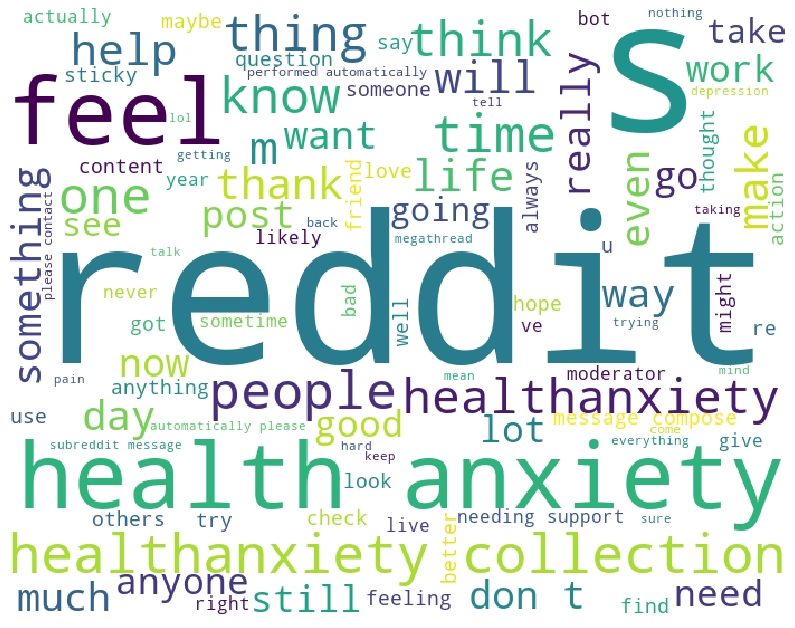

In [58]:
text = ' '
stopwords = set(STOPWORDS) 

for x in df_edit.body: 

    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 700, 
                      height = 550,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('reddit_wordcloud.png')

In [64]:
df_clean = df_edit.copy()

In [67]:
df_clean.loc[df_clean["subreddit_name"]=="aww", "subreddit_name"] = 0
df_clean.loc[df_clean["subreddit_name"]=="HumansBeingBros", "subreddit_name"] = 0
df_clean.loc[df_clean["subreddit_name"]=="wholesomememes", "subreddit_name"] = 0
df_clean.loc[df_clean["subreddit_name"]=="depression", "subreddit_name"] = 1
df_clean.loc[df_clean["subreddit_name"]=="SuicideWatch", "subreddit_name"] = 1
df_clean.loc[df_clean["subreddit_name"]=="depression_memes", "subreddit_name"] = 1
df_clean.loc[df_clean["subreddit_name"]=="anxiety", "subreddit_name"] = 2
df_clean.loc[df_clean["subreddit_name"]=="anxietymemes", "subreddit_name"] = 2
df_clean.loc[df_clean["subreddit_name"]=="healthanxiety", "subreddit_name"] = 2

In [76]:
df_clean.rename({"subreddit_name":"target"}, axis=1, inplace=True)

In [77]:
df_clean.head()

,body,score,target
3,"Hiethcliff, Garfield..?",1,0
6,That looks like a Garfield,1,0
7,Tell it to pick up some weights or gloves… no ...,1,0
8,Please put him on a diet now or he will die wa...,1,0
10,I bet this dad never agreed to have a dog in t...,1,0


In [78]:
df_clean.to_csv("clean.csv")

In [81]:
df_clean.isnull().sum()

body      0
score     0
target    0
dtype: int64